In [2]:
import numpy as np

import pandas as pd

import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

**1. Nhập dữ liệu và thống kê những thông tin cơ bản của các thuộc tính.**

In [5]:
print("Huỳnh Thị Trúc Lam - 6351071040")
with open('titanic.csv') as f:
  df = pd.read_csv(f, dtype={'age': np.float64, 'sibsp': np.int64, 'parch': np.int64})
df.head()


Huỳnh Thị Trúc Lam - 6351071040


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [6]:
print("Huỳnh Thị Trúc Lam - 6351071040")
df.info()

Huỳnh Thị Trúc Lam - 6351071040
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [7]:
print("Huỳnh Thị Trúc Lam - 6351071040")
df.describe()

Huỳnh Thị Trúc Lam - 6351071040


,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


**2. Liệt kê danh sách 5 thuộc tính có số lượng giá trị rỗng nhiều nhất.**

In [8]:
print("Huỳnh Thị Trúc Lam - 6351071040")

total = df.isnull().sum().sort_values(ascending=False)
percent_1= df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

Huỳnh Thị Trúc Lam - 6351071040


,Total,Percent
body,1188,90.8
cabin,1014,77.5
boat,823,62.9
home.dest,564,43.1
age,263,20.1


**3. Vẽ biểu đồ khảo sát sự liên quan giữa thuộc tính Độ tuổi (age), Giới tính (sex) và thuộc tính quyết định – khả năng sống sót (survived) và đưa ra nhận xét.**

Huỳnh Thị Trúc Lam - 6351071040


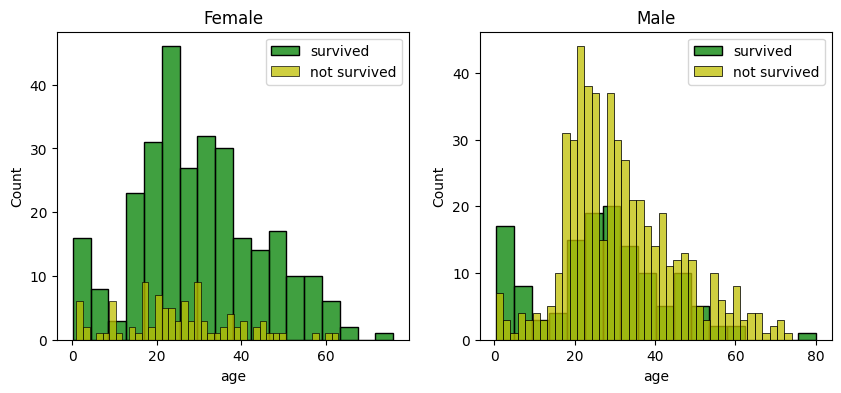

In [10]:
print("Huỳnh Thị Trúc Lam - 6351071040")

survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = df[df['sex']=='female']
men = df[df['sex']=='male']

ax = sns.histplot(women[women['survived']==1].age.dropna(), bins=18, label = survived, ax = axes[0], kde =False, color ='g')
ax = sns.histplot(women[women['survived']==0].age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False, color ='y')
ax.legend()
ax.set_title('Female')
ax = sns.histplot(men[men['survived']==1].age.dropna(), bins=18, label = survived, ax = axes[1], kde =False, color ='g')
ax = sns.histplot(men[men['survived']==0].age.dropna(), bins=40, label = not_survived, ax = axes[1], kde =False, color ='y')
ax.legend()
_ = ax.set_title('Male')

**4. Vẽ biểu đồ khảo sát sự liên quan giữa thuộc tính Cổng lên tàu (embarked) và loại vé (pclass) với khả năng sống sót (survived), phân biệt theo Giới tính (sex) và đưa ra nhận xét.**

Huỳnh Thị Trúc Lam - 6351071040


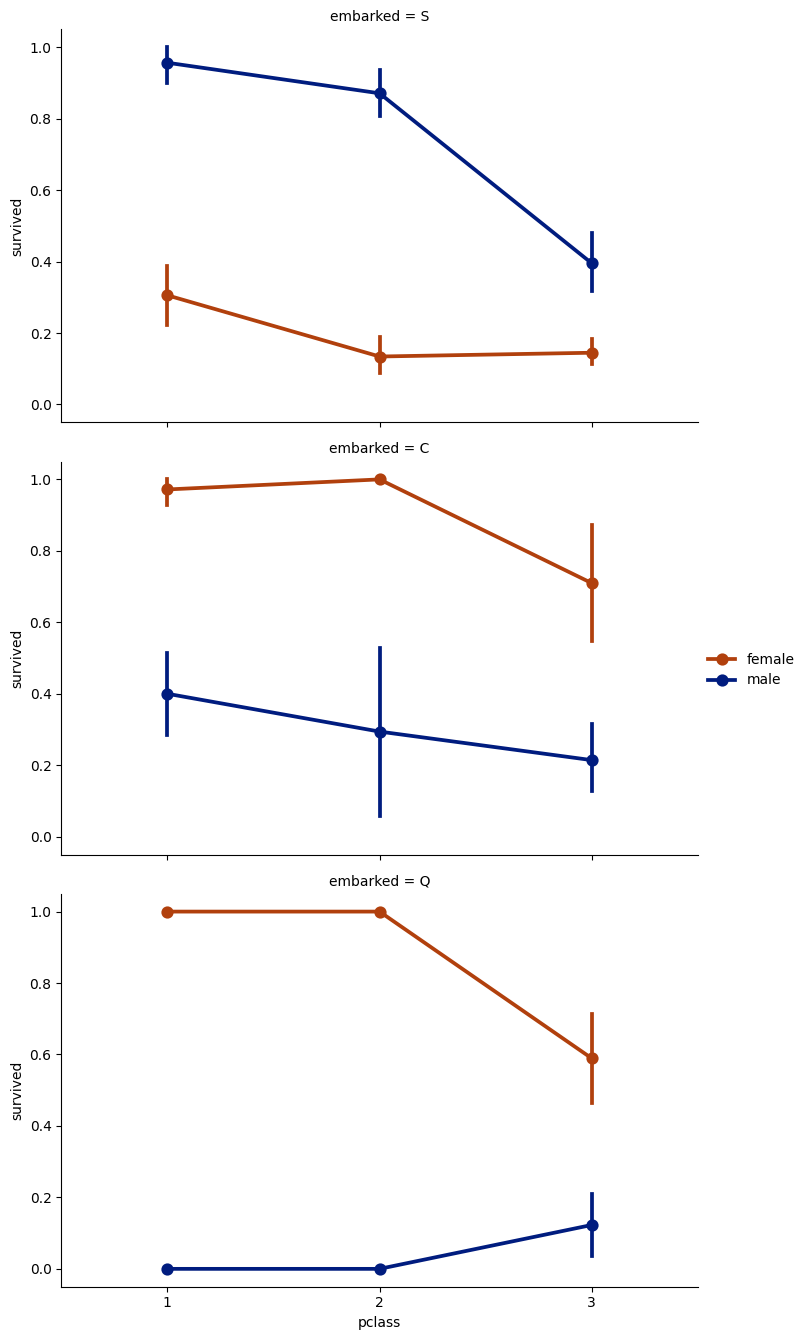

In [14]:
print("Huỳnh Thị Trúc Lam - 6351071040")

FaceGrid = sns.FacetGrid(df, row='embarked', height=4.5, aspect=1.6)
FaceGrid.map(sns.pointplot, 'pclass', 'survived', 'sex', palette='dark', order=None, hue_order=None)
FaceGrid.add_legend()

Huỳnh Thị Trúc Lam - 6351071040


<Axes: xlabel='pclass', ylabel='survived'>

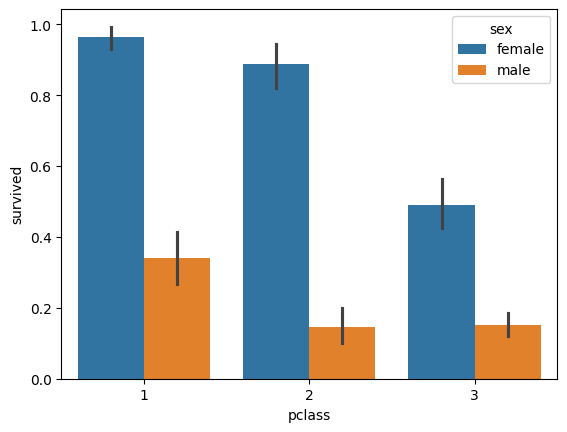

In [17]:
print("Huỳnh Thị Trúc Lam - 6351071040")

sns.barplot(x='pclass', y='survived', hue='sex', data=df)

Huỳnh Thị Trúc Lam - 6351071040


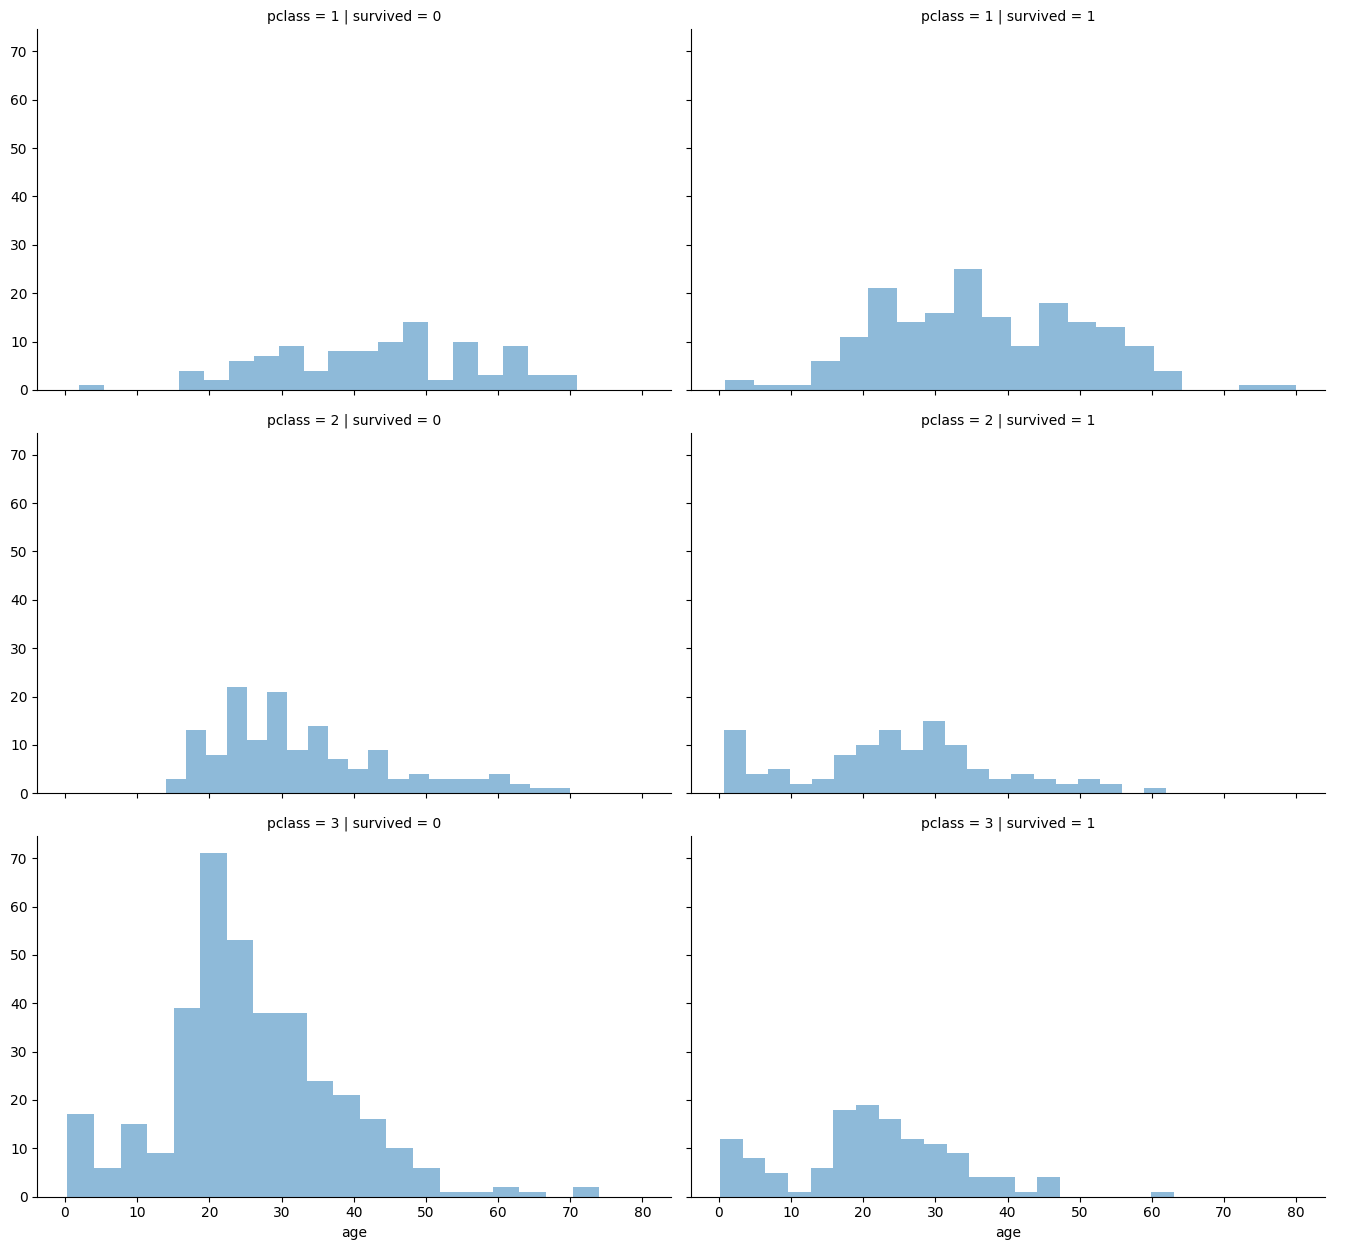

In [19]:
print("Huỳnh Thị Trúc Lam - 6351071040")

grid = sns.FacetGrid(df, row='pclass', col='survived', height=4.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend()

**5. Thống kê số người đi cùng (anh chị em/vợ chồng hoặc cha mẹ/con cái) và khảo sát sự liên quan với thuộc tính quyết định và đưa ra nhận xét.**

In [20]:
print("Huỳnh Thị Trúc Lam - 6351071040")

for dataset in df:
    df['relatives'] = df['sibsp'] + df['parch']
    df.loc[df['relatives'] > 0, 'not_alone'] = 0
    df.loc[df['relatives'] == 0, 'not_alone'] = 1
    df['not_alone'] = df['not_alone'].astype(int)
df['relatives'].value_counts()

Huỳnh Thị Trúc Lam - 6351071040


,count
relatives,
0,790
1,235
2,159
3,43
5,25
4,22
6,16
10,11
7,8


Huỳnh Thị Trúc Lam - 6351071040


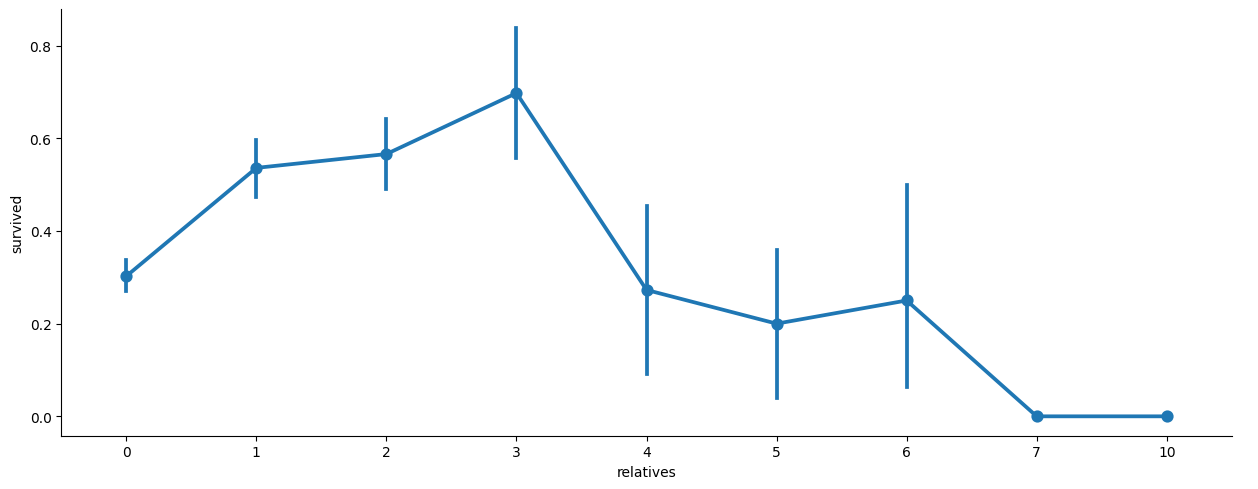

In [23]:
print("Huỳnh Thị Trúc Lam - 6351071040")

axes = sns.catplot(x='relatives', y='survived', kind='point', data=df, aspect=2.5)

**6. Tiền xử lý các thuộc tính thiếu dữ liệu và xóa bỏ các thuộc tính không cần thiết.**

In [26]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}

# Check if 'cabin' column exists before processing
if 'cabin' in df.columns:
  for dataset_alias in [df]: # Use a different alias to avoid confusion
    dataset_alias['cabin'] = dataset_alias['cabin'].fillna("U0")
    dataset_alias['deck'] = dataset_alias['cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset_alias['deck'] = dataset_alias['deck'].map(deck)
    dataset_alias['deck'] = dataset_alias['deck'].fillna(0)
    dataset_alias['deck'] = dataset_alias['deck'].astype(int)

  df = df.drop(['cabin'], axis=1)
else:
  print("Huỳnh Thị Trúc Lam - 6351071040: 'cabin' column not found, skipping processing and dropping.")

df['ticket'].describe()

Huỳnh Thị Trúc Lam - 6351071040: 'cabin' column not found, skipping processing and dropping.


,ticket
count,1309
unique,929
top,CA. 2343
freq,11


In [27]:
df = df.drop(['ticket'], axis=1)

if 'boat' in df.columns:
  df = df.drop(['boat'], axis=1)

df = df.drop(['body'], axis=1)
df = df.drop(['home.dest'], axis=1)

In [29]:
for dataset in [df]:
  mean = df["age"].mean()
  std = df["age"].std()
  is_null = df["age"].isnull().sum()

  rand_age = np.random.randint(mean - std, mean + std, size = is_null)

  age_slice = df["age"].copy()
  age_slice[np.isnan(age_slice)] = rand_age
  df["age"] = age_slice
  df["age"] = df["age"].astype(int)

print("Huỳnh Thị Trúc Lam - 6351071040")

df["age"].isnull().sum()

Huỳnh Thị Trúc Lam - 6351071040


np.int64(0)

In [32]:
print("Huỳnh Thị Trúc Lam - 6351071040")

df['embarked'].describe()

Huỳnh Thị Trúc Lam - 6351071040


,embarked
count,1307
unique,3
top,S
freq,914


In [33]:
common_value = 'S'
for dataset in [df]:
  dataset['embarked'] = dataset['embarked'].fillna(common_value)